In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from concurrent.futures import ProcessPoolExecutor
from tqdm import tqdm
from utils import *

### var est  for mean

In [11]:
# Parameters
sim_n = 2000 
n = 100      
B = 200
seed = 42

Simulations: 100%|██████████| 2000/2000 [00:01<00:00, 1034.68simulation/s]


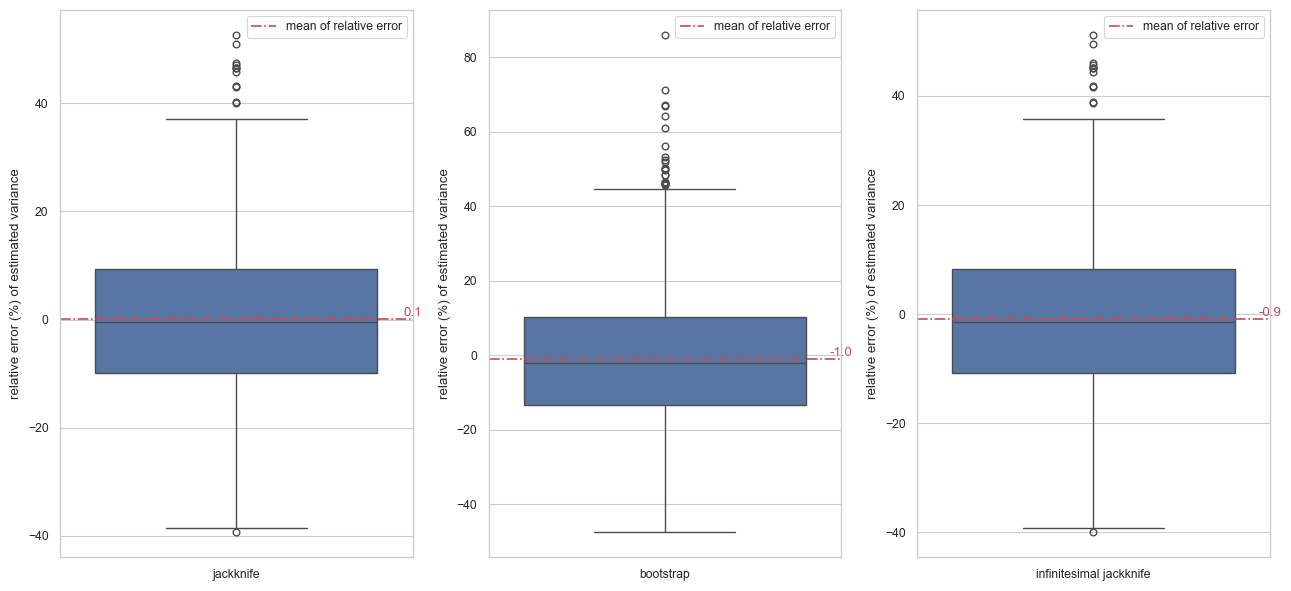

In [13]:
np.random.seed(42)

# Arrays to store results
var_jackknife_sim = np.zeros(sim_n)
var_boot_sim = np.zeros(sim_n)
var_ijk_sim = np.zeros(sim_n)

# Run simulations
with ProcessPoolExecutor() as executor:
    futures = [
        executor.submit(simulate_mean, 
                        i=i, 
                        n=n, 
                        B=B, 
                        seed=seed)
        for i in range(sim_n)
    ]
    
    for i, future in enumerate(tqdm(futures, desc="Simulations", unit="simulation")):
        var_jackknife_sim[i], var_boot_sim[i], var_ijk_sim[i] = future.result()

true_variance = 1/n
relative_error = (var_ijk_sim - true_variance) / true_variance *100
df_inf = pd.DataFrame({'infinitesimal jackknife': relative_error})

relative_error = (var_jackknife_sim - true_variance) / true_variance *100
df_jack = pd.DataFrame({'jackknife': relative_error})

relative_error = (var_boot_sim - true_variance) / true_variance *100
df_boot = pd.DataFrame({'bootstrap': relative_error})

mean_inf = df_inf.mean().values[0]
mean_jack = df_jack.mean().values[0]
mean_boot = df_boot.mean().values[0]

sns.set_theme(context='paper', style='whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(13, 6))

# Plot jackknife
sns.set_theme(context='paper', style='whitegrid')
sns.boxplot(data=df_jack, ax=axes[0])
axes[0].axhline(y=mean_jack, color='r', linestyle='dashdot', label='mean of relative error')
axes[0].text(0.5, mean_jack, f'{mean_jack:.1f}', color='r', ha='center', va='bottom')
axes[0].set_ylabel('relative error (%) of estimated variance')
axes[0].legend()

# Plot bootstrap
sns.set_theme(context='paper', style='whitegrid')
sns.boxplot(data=df_boot, ax=axes[1])
axes[1].axhline(y=mean_boot, color='r', linestyle='dashdot', label='mean of relative error')
axes[1].text(0.5, mean_boot, f'{mean_boot:.1f}', color='r', ha='center', va='bottom')
axes[1].set_ylabel('relative error (%) of estimated variance')
axes[1].legend()

# Plot infitesimal jackknife
sns.set_theme(context='paper', style='whitegrid')
sns.boxplot(data=df_inf, ax=axes[2])
axes[2].axhline(y=mean_inf, color='r', linestyle='dashdot', label='mean of relative error')
axes[2].text(0.5, mean_inf, f'{mean_inf:.1f}', color='r', ha='center', va='bottom')
axes[2].set_ylabel('relative error (%) of estimated variance')
axes[2].legend()

plt.tight_layout()
plt.savefig("boxplot_mean_var_est.png", dpi=1000)
plt.show()


### var est for pearson correlation coefficient

In [ ]:
# Parameters
mean = [0, 0]
p = 0.7
cov = [[1, p], [p, 1]]

sim_n = 2_000
n = 500
B = 200
seed = 42

Simulations: 100%|██████████| 2000/2000 [00:29<00:00, 68.36simulation/s]


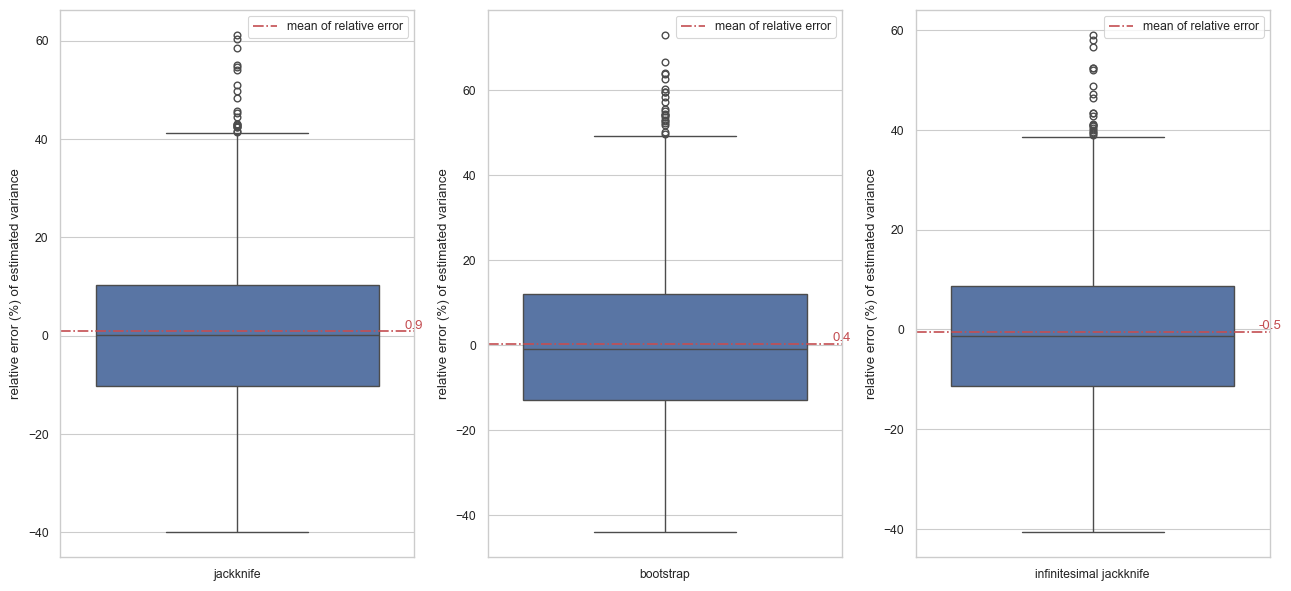

In [16]:
var_jackknife_sim = np.zeros(sim_n)
var_boot_sim = np.zeros(sim_n)
var_ijk_sim = np.zeros(sim_n)

# Simulation
with ProcessPoolExecutor() as executor:
    futures = [
        executor.submit(simulate_pearson, 
                        mean=mean, 
                        cov=cov, 
                        n=n, 
                        B=B, 
                        sim_i=i, 
                        seed=seed)
        for i in range(sim_n)
    ]
    
    for i, future in enumerate(tqdm(futures, desc="Simulations", unit="simulation")):
        var_jackknife_sim[i], var_boot_sim[i], var_ijk_sim[i]  = future.result()

# True std for the correlation https://www.jstor.org/stable/pdf/2277400.pdf?refreqid=fastly-default%3Aef46e66363b4ca95a1a81b2e1b6d92f0&ab_segments=&origin=&initiator=&acceptTC=1
true_variance = ((1 - p**2) / np.sqrt(n)) ** 2
relative_error = (var_ijk_sim - true_variance) / true_variance *100
df_inf = pd.DataFrame({'infinitesimal jackknife': relative_error})
relative_error = (var_jackknife_sim - true_variance) / true_variance *100
df_jack = pd.DataFrame({'jackknife': relative_error})
relative_error = (var_boot_sim - true_variance) / true_variance *100
df_boot = pd.DataFrame({'bootstrap': relative_error})

mean_inf = df_inf.mean().values[0]
mean_jack = df_jack.mean().values[0]
mean_boot = df_boot.mean().values[0]

sns.set_theme(context='paper', style='whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(13, 6))


# Plot jackknife
sns.set_theme(context='paper', style='whitegrid')
sns.boxplot(data=df_jack, ax=axes[0])
axes[0].axhline(y=mean_jack, color='r', linestyle='dashdot', label='mean of relative error')
axes[0].text(0.5, mean_jack, f'{mean_jack:.1f}', color='r', ha='center', va='bottom')
axes[0].set_ylabel('relative error (%) of estimated variance')
axes[0].legend()

# Plot bootstrap
sns.set_theme(context='paper', style='whitegrid')
sns.boxplot(data=df_boot, ax=axes[1])
axes[1].axhline(y=mean_boot, color='r', linestyle='dashdot', label='mean of relative error')
axes[1].text(0.5, mean_boot, f'{mean_boot:.1f}', color='r', ha='center', va='bottom')
axes[1].set_ylabel('relative error (%) of estimated variance')
axes[1].legend()

# Plot infitesimal jackknife
sns.set_theme(context='paper', style='whitegrid')
sns.boxplot(data=df_inf, ax=axes[2])
axes[2].axhline(y=mean_inf, color='r', linestyle='dashdot', label='mean of relative error')
axes[2].text(0.5, mean_inf, f'{mean_inf:.1f}', color='r', ha='center', va='bottom')
axes[2].set_ylabel('relative error (%) of estimated variance')
axes[2].legend()

plt.tight_layout()
plt.savefig("boxplot_corr_var_est.png", dpi=1000)
plt.show()

### var est of median

In [17]:
# Parameters
sim_n = 2_000
n = 500
B = 200
seed = 42

Simulations: 100%|██████████| 2000/2000 [00:12<00:00, 161.35simulation/s]


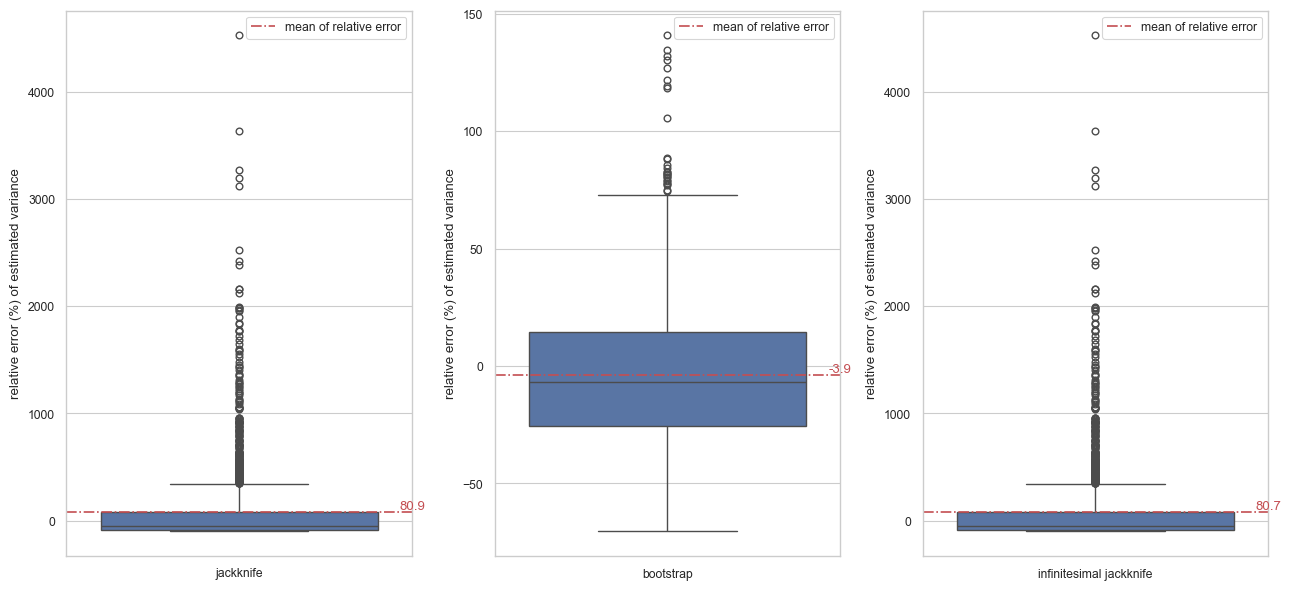

In [18]:
var_jackknife_sim = np.zeros(sim_n)
var_boot_sim = np.zeros(sim_n)
var_emp = np.zeros(sim_n)
var_ijk_sim = np.zeros(sim_n)

# Simulation
with ProcessPoolExecutor() as executor:
    futures = [
        executor.submit(simulate_median, 
                        n=n,
                        B=B, 
                        sim_i=i, 
                        seed=seed)
        for i in range(sim_n)
    ]
    
    for i, future in enumerate(tqdm(futures, desc="Simulations", unit="simulation")):
        var_jackknife_sim[i], var_boot_sim[i], var_emp[i], var_ijk_sim[i] = future.result()


true_variance = np.var(var_emp)
relative_error = (var_ijk_sim - true_variance) / true_variance *100
df_inf = pd.DataFrame({'infinitesimal jackknife': relative_error})
relative_error = (var_jackknife_sim - true_variance) / true_variance *100
df_jack = pd.DataFrame({'jackknife': relative_error})
relative_error = (var_boot_sim - true_variance) / true_variance *100
df_boot = pd.DataFrame({'bootstrap': relative_error})

mean_inf = df_inf.mean().values[0]
mean_jack = df_jack.mean().values[0]
mean_boot = df_boot.mean().values[0]

sns.set_theme(context='paper', style='whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(13, 6))


# Plot jackknife
sns.set_theme(context='paper', style='whitegrid')
sns.boxplot(data=df_jack, ax=axes[0])
axes[0].axhline(y=mean_jack, color='r', linestyle='dashdot', label='mean of relative error')
axes[0].text(0.5, mean_jack, f'{mean_jack:.1f}', color='r', ha='center', va='bottom')
axes[0].set_ylabel('relative error (%) of estimated variance')
axes[0].legend()

# Plot bootstrap
sns.set_theme(context='paper', style='whitegrid')
sns.boxplot(data=df_boot, ax=axes[1])
axes[1].axhline(y=mean_boot, color='r', linestyle='dashdot', label='mean of relative error')
axes[1].text(0.5, mean_boot, f'{mean_boot:.1f}', color='r', ha='center', va='bottom')
axes[1].set_ylabel('relative error (%) of estimated variance')
axes[1].legend()

# Plot infitesimal jackknife
sns.set_theme(context='paper', style='whitegrid')
sns.boxplot(data=df_inf, ax=axes[2])
axes[2].axhline(y=mean_inf, color='r', linestyle='dashdot', label='mean of relative error')
axes[2].text(0.5, mean_inf, f'{mean_inf:.1f}', color='r', ha='center', va='bottom')
axes[2].set_ylabel('relative error (%) of estimated variance')
axes[2].legend()

plt.tight_layout()
plt.savefig("boxplot_median_var_est.png", dpi=1000)
plt.show()
        